# Online Assessment - Data Scientist

### Candidate: Ng Wen Ge

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import datetime as dt
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

## Q1)  Write a function in python to sum up a given set of numbers other than itself 

Input: An array of n integers nums

Output: An array output such that output[i] is equal to the sum of all the elements of nums except nums[i]. 

For example, given [1,2,3,4], return [9,8,7,6]. 

In [3]:
def sum_others(nums):
    return [sum(nums)-num for num in nums]

In [4]:
sum_others([1,2,3,4])

[9, 8, 7, 6]

## Q2 Jobposts Data Exploration and Analysis 

![alt text](screenshot.jpg "Example")

#### Extract the following fields by processing content in the jobpost column: 

1. Job Title 
2. Position Duration 
3. Position Location 
4. Job Description 
5. Job Responsibilities 
6. Required Qualifications 
7. Remuneration 
8. Application Deadline 
9. About Company 

In [5]:
df = pd.read_csv('data job posts.csv')

In [663]:
def clean_text(x):
    x1 = x.replace('\r',' ').replace('\n',' ').replace('\t',' ').strip()
    x1 = ' '.join(i for i in x1.split(' ') if i != '')
    return x1

def find_predecessor(x, ls_to_check):
    for str_to_check in ls_to_check:
        c = re.compile(r'\s+({}):'.format(str_to_check))
        if len(c.findall(x))>0:
            return str_to_check
    return np.nan

def adj_titles(ls_titles, ls_to_check):
    for idx,i in enumerate(ls_titles):
        for j in ls_to_check:
            if j in i:
                ls_titles[idx] = j
    return ls_titles

def find_successor(x, predecessor, ls_to_check, c):
#     c = re.compile(r'\s+([A-Z]*\s{0,1}[A-Z]{3,}):')
    titles = c.findall(x)
    try:
        find_index = titles.index(predecessor)
    except:
        titles = adj_titles(titles, ls_to_check)
        find_index = titles.index(predecessor)
    if find_index == len(titles)-1:
        return np.nan
    else:
        return titles[titles.index(predecessor)+1]

def extract_info(x, possible_words, custom_compiler):
    '''
    Given the jobpost and list of words to search, this function looks for
    predecessor which is current title in capital letter (the word to search), 
    and successor which is the next title in capital letter and extract the 
    information between them.
    '''
    predecessor = find_predecessor(x, possible_words)
    if pd.isna(predecessor):
        return predecessor
    else:
        successor = find_successor(x, predecessor, possible_words, custom_compiler)
        if pd.isna(successor):
            c = re.compile(r'{}:((?s).*)'.format(predecessor))
            return c.findall(x)[0]
        else:
            c = re.compile(r'{}:((?s).*){}'.format(predecessor,successor))
            return clean_text(c.findall(x)[0])

In [664]:
compiler = re.compile(r'\s+([A-Z]*\s{0,1}[A-Z]{3,}):')

df['Job Title'] = df['jobpost'].apply(lambda x: extract_info(x,['JOB TITLE','TITLE'],compiler),1)
df['Position Duration'] = df['jobpost'].apply(lambda x: extract_info(x, ['POSITION DURATION','DURATION'],compiler),1)
df['Position Location'] = df['jobpost'].apply(lambda x: extract_info(x, ['POSITION LOCATION','LOCATION'],compiler),1)
df['Job Description'] = df['jobpost'].apply(lambda x: extract_info(x, ['JOB DESCRIPTION','DESCRIPTION'],compiler),1)
df['Job Responsibilities'] = df['jobpost'].apply(lambda x: extract_info(x, ['JOB RESPONSIBILITIES','RESPONSIBILITIES'],compiler),1)
df['Required Qualifications'] = df['jobpost'].apply(lambda x: extract_info(x, ['REQUIRED QUALIFICATIONS','QUALIFICATIONS'],compiler),1)
df['Remuneration'] = df['jobpost'].apply(lambda x: extract_info(x, ['REMUNERATION','SALARY'],compiler),1)
df['Application Deadline'] = df['jobpost'].apply(lambda x: extract_info(x, ['APPLICATION DEADLINE'],compiler),1)
df['About Company'] = df['jobpost'].apply(lambda x: extract_info(x, ['ABOUT COMPANY'],compiler),1)

C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'JOB TITLE:((?s).*)PO' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'TITLE:((?s).*)DURATI' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'JOB TITLE:((?s).*)WO' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'TITLE:((?s).*)DESCRI' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'JOB TITLE:((?s).*)JO' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'JOB TITLE:((?s).*)DU' (truncated)
C:\Users\n

C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: Flags not at the start of the expression 'ABOUT COMPANY:((?s).' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'ABOUT COMPANY:((?s).' (truncated)


In [665]:
def validate_with_nulls(x_original, x_new):
    print(f'Total NULL values from original data: {x_original.isnull().sum()}')
    print(f'Total NULL values using "extracted_info" function: {x_new.isnull().sum()}')

In [666]:
validate_with_nulls(df['Title'],df['Job Title'])

Total NULL values from original data: 28
Total NULL values using "extracted_info" function: 21


In [667]:
validate_with_nulls(df['Duration'],df['Position Duration'])

Total NULL values from original data: 8187
Total NULL values using "extracted_info" function: 8194


In [668]:
validate_with_nulls(df['Location'],df['Position Location'])

Total NULL values from original data: 32
Total NULL values using "extracted_info" function: 46


In [669]:
validate_with_nulls(df['JobDescription'],df['Job Description'])

Total NULL values from original data: 3886
Total NULL values using "extracted_info" function: 45


In [670]:
validate_with_nulls(df['JobRequirment'],df['Job Responsibilities'])

Total NULL values from original data: 2513
Total NULL values using "extracted_info" function: 2496


In [671]:
validate_with_nulls(df['RequiredQual'],df['Required Qualifications'])

Total NULL values from original data: 481
Total NULL values using "extracted_info" function: 473


In [672]:
validate_with_nulls(df['Salary'],df['Remuneration'])

Total NULL values from original data: 9358
Total NULL values using "extracted_info" function: 9282


In [673]:
validate_with_nulls(df['Deadline'],df['Application Deadline'])

Total NULL values from original data: 65
Total NULL values using "extracted_info" function: 58


In [674]:
validate_with_nulls(df['AboutC'],df['About Company'])

Total NULL values from original data: 6523
Total NULL values using "extracted_info" function: 6523


#### Identify the company with the most number of job ads in the past 2 years 

Assumed period for past 2 years: 2014 - 2015

In [18]:
# Check duplications
duplications = df.duplicated().sum()
print(f'Duplicated rows: {duplications}')

Duplicated rows: 39


In [19]:
# Remove duplicates
df = df.drop_duplicates()

In [20]:
# Display range of years and number of job posts appeared in each year
df['Year'].value_counts(sort=False)

2004     875
2005    1137
2006    1115
2007    1536
2008    1785
2009    1190
2010    1508
2011    1692
2012    2143
2013    1997
2014    1981
2015    2003
Name: Year, dtype: int64

In [21]:
most_job_ads = df[df['Year'].isin([2014,2015])]
total_jobposts = most_job_ads.shape[0]
most_job_ads = most_job_ads.groupby('Company').agg({'jobpost':'count'}).sort_values('jobpost',ascending=False)
top_company = most_job_ads.index[0]
top_jobposts = most_job_ads['jobpost'][0]

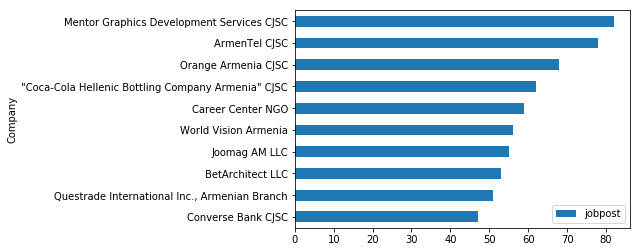

In [22]:
most_job_ads.head(10).sort_values('jobpost').plot(kind='barh')

In [23]:
print(f'Total number of job posts in the past 2 years: {total_jobposts}')
print(f'Company with the most number of job posts in the past 2 years: {top_company}')
print('-'*40)
print('Number of job posts: {} ({:.1f}% of total)'.format(top_jobposts,top_jobposts/total_jobposts*100))

Total number of job posts in the past 2 years: 3984
Company with the most number of job posts in the past 2 years: Mentor Graphics Development Services CJSC
----------------------------------------
Number of job posts: 82 (2.1% of total)


#### Identify the month with the largest number of job ads over the years 

Period: 2004 - 2015

In [30]:
month_jobpost = df.groupby('Month').agg({'jobpost':'count'})
month_max = month_jobpost['jobpost'].idxmax()
max_jobpost = month_jobpost.loc[month_max,:][0]

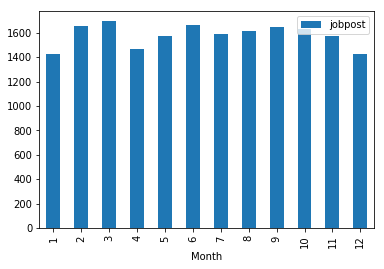

In [31]:
month_jobpost.plot(kind='bar')

In [32]:
print('Month with largest number of job ads over the years: {}'.format(dt.date(2000, month_max, 1).strftime('%B')))

Month with largest number of job ads over the years: March


#### Clean text and generate new text from Job Responsibilities column: The new text shall not contain any stop words, and the plural words shall be converted into singular words.

In [35]:
def clean_text(x):
    
    if pd.isna(x):
        return np.nan
    
    else:
        new_words = list()

        # tokenize only characters, symbols will be excluded
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        words = [i.lower() for i in tokenizer.tokenize(x)]

        # exclude stop words
        ls_stopwords = set(nltk.corpus.stopwords.words('english'))
        words = [i for i in words if i not in ls_stopwords]

        # lemmatize all the words with POS
        wnl = nltk.WordNetLemmatizer()
        for word, tag in nltk.pos_tag(words):
            if tag.startswith("NN"):
                new_words.append(wnl.lemmatize(word, pos='n'))
            elif tag.startswith('VB'):
                new_words.append(wnl.lemmatize(word, pos='v'))
            elif tag.startswith('JJ'):
                new_words.append(wnl.lemmatize(word, pos='a'))
            else:
                new_words.append(word)

        return ' '.join(i for i in new_words)

In [36]:
df['Job Responsibilities_cleaned'] = df['Job Responsibilities'].map(lambda x: clean_text(x))

In [210]:
jobpostnum = 0
print(f'EXAMPLE: JOB POST {jobpostnum}')
print('-'*40)
print('ORIGINAL')
print(df['Job Responsibilities'][jobpostnum])
print('-'*40)
print('PROCESSED')
print(df['Job Responsibilities_cleaned'][jobpostnum])

EXAMPLE: JOB POST 1
----------------------------------------
ORIGINAL
- Presenting the CC program to interested parties; - Assisting in planning and scheduling of programmatic meetings and events (this includes coordinating logistics for CC staff, visitors and participants); - Assisting the Program Staff; - Translation/Interpretation from Armenian to English and vice versa; - Helping create, maintain and update the CC filing system and databases; - Completing general administrative tasks for the CC program within the office; - Other duties as assigned/ needed.
----------------------------------------
PROCESSED
present cc program interested party assist plan schedule programmatic meeting event include coordinate logistics cc staff visitor participant assist program staff translation interpretation armenian english vice versa help create maintain update cc filing system databases complete general administrative task cc program within office duty assign need


#### Write functions to identify null/NA values and to replace null/NA values with a custom message in “Duration” column 

Do not quite understand the question and require further clarification:
* is there a custom message in "Duration" column?
* replace null/NA in "Duration" column only? Do other columns require null/NA replacement too?

In [675]:
def identify_duration(jobpost, duration, c):
    if pd.isna(duration):
        x = jobpost
        return extract_info(x,['TERM','WORK HOURS'],c)
    else:
        return duration

In [676]:
compiler = re.compile(r'\s+([A-Z/\s]*\s{0,1}[A-Z]{3,}):')
df['Position Duration_new'] = df.apply(lambda x: identify_duration(x['jobpost'],x['Position Duration'],compiler), 1)

C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'WORK HOURS:((?s).*)J' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'WORK HOURS:((?s).*)N' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'TERM:((?s).*)LOCATIO' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'TERM:((?s).*)OPEN TO' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'TERM:((?s).*)START D' (truncated)
C:\Users\ngwge\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Flags not at the start of the expression 'TERM:((?s).*)INTENDE' (truncated)
C:\Users\n

In [677]:
null_before = df['Position Duration'].isnull().sum()
null_after = df['Position Duration_new'].isnull().sum()
print('# of null values before this step:',null_before)
print('# of null values after the search for job duration:',null_after)
print(f'Identified and replaced {null_before-null_after} unknown duration with custom messages')

# of null values before this step: 8194
# of null values after the search for job duration: 6164
Identified and replaced 2030 unknown duration with custom messages


#### Store the results in a new Dataframe/SQL table(s) 

In [680]:
df.to_csv('data_output.csv', index=False)

## Q3 Semantic Similarity

In [627]:
from gensim.utils import to_unicode
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [450]:
# clean 'Job Description', 'Job Title' and 'Required Qualifications' for performing word embedding
df['Job Title_cleaned'] = df['Job Title'].map(lambda x: clean_text(x))
df['Job Description_cleaned'] = df['Job Description'].map(lambda x: clean_text(x))
df['Required Qualifications_cleaned'] = df['Required Qualifications'].map(lambda x: clean_text(x))

In [462]:
# get unique jobposts as the inputs, as current dataset contains some duplicated job posts with different posting time
df_unique = df[~df.duplicated('jobpost')]

# fill na with ' ', if there is any
df_unique = df_unique.fillna(' ')

In [630]:
d_inputs = {}
d_inputs['X_1'] = np.array(df_unique['Job Responsibilities_cleaned'])
d_inputs['X_3'] = np.array(df_unique['Job Description_cleaned'])

In [ ]:
# Performing Doc2Vec might take some times, alternatively, these trained models
# that have been backed up as zipped pickle file ("models_backup.gz") can be 
# retrieved with function retrieve_data in the next 2 cells

d_models = {}

for k,v in d_inputs.items():
    print('Working on',k,'-'*60)
    tagged = []
    docs_map = {}
    for idx,jobpost in enumerate(v):
        tag = u'JOBPOST_{:d}'.format(idx)
        sentence = TaggedDocument(words=to_unicode(jobpost).split(), tags=[tag])
        tagged.append(sentence)
        docs_map[tag] = jobpost
        
    model = Doc2Vec(tagged, dm=0, alpha=0.025, vector_size=20, min_alpha=0.025, min_count=0, epochs=100)
    for epoch in range(model.epochs):
        if epoch%20 ==0:
            print('Training epoch',epoch)
            model.train(tagged,total_examples=model.corpus_count,epochs=model.epochs)
            model.alpha -= 0.002
    model.min_alpha = model.alpha
    
    d_models[k] = {'model':model, 'tagged':tagged, 'mapping':docs_map}

In [632]:
import pickle
import zlib

def backup_data(d, name, path='./'):
    print('Backup data: {}..'.format(name))
    with open('{}.gz'.format(path+name), 'wb') as handle:
        handle.write(zlib.compress(pickle.dumps(d, protocol=pickle.HIGHEST_PROTOCOL),9))
        
def retrieve_data(name, path='./'):
    print('Retrieve data: {}..'.format(name))
    with open('{}.gz'.format(path+name), 'rb') as handle:
        d = zlib.decompress(handle.read())
        return pickle.loads(d)

In [633]:
backup_data(d_models, 'models_backup')

Backup data: models_backup..


In [641]:
d_models = retrieve_data('models_backup')

Retrieve data: models_backup..


In [642]:
# sense check on some examples
# X_1 - Job Responsibilities
# X_3 - Job Description

model = d_models['X_3']['model']
tagged = d_models['X_3']['tagged']
docs_map = d_models['X_3']['mapping']

check_id = 'JOBPOST_5'
inferred_vec = model.infer_vector(tagged[int(check_id.split('_')[1])].words)
sim_vec = model.docvecs.most_similar([inferred_vec], topn=len(model.docvecs))
# jobpost_id, _ = similarity_vec[0]
jobpost_id_topmatch, score = sim_vec[1]

print('JOB POST: {}\n{}'.format(check_id, docs_map[check_id]))
print('\nSIMILAR POST ({:.3f}): {}\n{}'.format(score, jobpost_id_topmatch, docs_map[jobpost_id_topmatch]))

JOB POST: JOBPOST_5
saleswoman sell menswear accessory

SIMILAR POST (0.747): JOBPOST_18656
shop assistant responsible merchandising sale jewellery accessory


In [643]:
from sklearn.cluster import Birch, DBSCAN, KMeans
from sklearn import metrics
from collections import Counter

In [644]:
# compile input from X_1 (Responsibilities) and X_3 (Job Description) for performing clustering

X_clustering = None
for k,v in d_models.items():
    model = v['model']
    tagged = v['tagged']
    if X_clustering is None:
        inferred = [model.infer_vector(i.words) for i in tagged]
        X_clustering = inferred
    else:
        inferred = [model.infer_vector(i.words) for i in tagged]
        X_clustering = [np.concatenate((i,inferred[idx])) for idx,i in enumerate(X_clustering)]

In [604]:
# clus_model = DBSCAN(eps=0.8, min_samples=10).fit(X_clustering)
# labels = clus_model.labels_

In [647]:
for nclus in [5,15,35,65,95]:
    clus_model = KMeans(n_clusters=nclus,max_iter=800)
    clus_model.fit(X_clustering)
    labels = clus_model.labels_
    score = silhouette_score(X_clustering, labels, metric='euclidean')
    print('Silhouette score: {}'.format(score))

Silhouette score: -0.024393538013100624
Silhouette score: -0.008219313807785511
Silhouette score: -0.01489957794547081
Silhouette score: -0.020745614543557167
Silhouette score: -0.028584115207195282


In [646]:
# grid_search_nclus = [5,15,35,55]
# grid_search_thres = [0.3,0.6]

# for nclus in grid_search_nclus:
#     for thres in grid_search_thres:
#         clus_model = Birch(branching_factor=50, n_clusters=nclus, threshold=thres, compute_labels=True)
#         clus_model.fit(X_clustering)
#         labels = clus_model.labels_
#         print('Cluster Number: {}\tThreshold: {}'.format(nclus,thres))
#         score = silhouette_score(X_clustering, labels, metric='euclidean')
#         print('Silhouette score: {}'.format(score))

Cluster Number: 5	Threshold: 0.3
Silhouette score: -0.02995939925312996
Cluster Number: 5	Threshold: 0.6
Silhouette score: -0.03470129892230034
Cluster Number: 15	Threshold: 0.3
Silhouette score: -0.021071765571832657
Cluster Number: 15	Threshold: 0.6
Silhouette score: -0.019556401297450066
Cluster Number: 35	Threshold: 0.3
Silhouette score: -0.036954622715711594
Cluster Number: 35	Threshold: 0.6
Silhouette score: -0.02941192127764225
Cluster Number: 55	Threshold: 0.3
Silhouette score: -0.03157126158475876
Cluster Number: 55	Threshold: 0.6
Silhouette score: -0.02072286792099476


In [650]:
clus_model = KMeans(n_clusters=15,max_iter=800)
clus_model.fit(X_clustering)
labels = clus_model.labels_

In [651]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_clustering, labels))
print(Counter(labels))

Estimated number of clusters: 15
Estimated number of noise points: 0
Silhouette Coefficient: -0.035
Counter({9: 1996, 14: 1991, 6: 1976, 5: 1974, 1: 1679, 12: 1429, 3: 1368, 4: 1309, 11: 1216, 13: 1057, 0: 946, 10: 627, 2: 570, 8: 522, 7: 232})


In [655]:
df_unique.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT', 'Job Title', 'Position Duration',
       'Position Location', 'Job Description', 'Job Responsibilities',
       'Required Qualifications', 'Remuneration', 'Application Deadline',
       'About Company', 'Job Responsibilities_cleaned', 'Job Title_cleaned',
       'Job Description_cleaned', 'Required Qualifications_cleaned'],
      dtype='object')

In [660]:
max_label = Counter(labels).most_common()[0][0]
filtering = labels==max_label
it_related = df_unique[filtering]['IT'].sum()
print('Top group/cluster:',max_label)
print('Number of job ads within the cluster:',filtering.sum())
print('This group consists of {} or {:.1f}% IT related jobs'.format(it_related,it_related/filtering.sum()*100))

Top group/cluster: 9
Number of job ads within the cluster: 1996
This group consists of 1707 or 85.5% IT related jobs


The silhouette score is negative, indicating poor clustering results. The clustering model still has huge room for improvement and the input embedded vectors could be part of the fine tuning.

## Q4 Music and Artists

In [73]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

#### Extract raw text from https://en.wikipedia.org/wiki/1990s_in_music 

In [305]:
url = 'https://en.wikipedia.org/wiki/1990s_in_music'
req = Request(url)
response = urlopen(req)

In [306]:
soup = BeautifulSoup(response.read())

In [307]:
all_p = soup.find_all('p')

In [308]:
raw_text = ''''''
for i in all_p:
    raw_text = raw_text + ' ' + i.get_text()

In [309]:
print(raw_text)

 
 Popular music in the 1990s  saw the continuation of teen pop and dance-pop trends which had emerged in the 1970s and 1980s. Furthermore, hip hop grew and continued to be highly successful in the decade, with the continuation of the genre's golden age. Aside from rap, reggae, contemporary R&B and urban music in general remained extremely popular throughout the decade; urban music in the late-1980s and 1990s often blended with styles such as soul, funk and jazz, resulting in fusion genres such as new jack swing, neo-soul, hip hop soul and g-funk which were popular.
 Similarly to the 1980s, rock music was also very popular in the 1990s, yet, unlike the new wave and glam metal-dominated scene of the time, grunge,[1] Britpop, industrial rock and other alternative rock music emerged and took over as the most popular of the decade, as well as punk rock, ska punk and nu metal, amongst others, which attained a high level of success at different points throughout the years. Electronic music, 

#### Extract best-selling music artists from https://en.wikipedia.org/wiki/List_of_bestselling_music_artists 

Extract best-selling music artists by reputed sales

In [296]:
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_music_artists'
req = Request(url)
response = urlopen(req)

In [297]:
soup = BeautifulSoup(response.read())

In [298]:
def get_clean_text(bsoup):
    return bsoup.get_text().replace('\n','')

reputed_sales = [i.get_text() for i in soup.find_all('span', {'class':'mw-headline'}) if i.parent.name=='h3']
tables = soup.find_all('table',{'class':'wikitable plainrowheaders sortable'})

top_artists = []
for idx,sales_cat in enumerate(reputed_sales):
    print(f'Top artists with {sales_cat}:')
    top_artists_by_sales = [get_clean_text(i) for i in tables[idx].find_all(['tbody','tr','th'], {'scope':'row'})]
    top_artists += top_artists_by_sales
    for artist in top_artists_by_sales:
        print('\t{}'.format(artist))
    print('')

Top artists with 250 million or more records:
	The Beatles
	Elvis Presley
	Michael Jackson
	Madonna
	Elton John
	Led Zeppelin
	Rihanna
	Pink Floyd

Top artists with 200 million to 249 million records:
	Eminem
	Taylor Swift
	Mariah Carey
	Queen
	Whitney Houston
	Celine Dion
	AC/DC
	The Rolling Stones

Top artists with 120 million to 199 million records:
	Garth Brooks
	Eagles
	Billy Joel
	U2
	Phil Collins
	Aerosmith
	ABBA
	Frank Sinatra
	Barbra Streisand
	Justin Bieber
	Ed Sheeran
	Bruce Springsteen
	Kanye West
	Bruno Mars
	Metallica
	Bee Gees

Top artists with 100 million to 119 million records:
	Lady Gaga
	Drake
	Maroon 5
	Katy Perry
	Jay-Z
	Adele
	Chris Brown
	Lil Wayne
	Beyoncé
	Coldplay
	B'z
	Bon Jovi
	Linkin Park
	Fleetwood Mac
	Britney Spears
	Rod Stewart
	Backstreet Boys
	Guns N' Roses
	George Strait
	Eric Clapton
	Neil Diamond
	Santana
	Prince
	Kenny Rogers
	Paul McCartney
	Simon & Garfunkel
	Janet Jackson
	Julio Iglesias
	Chicago
	Dire Straits
	Bob Dylan
	Def Leppard
	Cher
	Gen

In [312]:
print('All best-selling music artists:\n',top_artists)

All best-selling music artists:
 ['The Beatles', 'Elvis Presley', 'Michael Jackson', 'Madonna', 'Elton John', 'Led Zeppelin', 'Rihanna', 'Pink Floyd', 'Eminem', 'Taylor Swift', 'Mariah Carey', 'Queen', 'Whitney Houston', 'Celine Dion', 'AC/DC', 'The Rolling Stones', 'Garth Brooks', 'Eagles', 'Billy Joel', 'U2', 'Phil Collins', 'Aerosmith', 'ABBA', 'Frank Sinatra', 'Barbra Streisand', 'Justin Bieber', 'Ed Sheeran', 'Bruce Springsteen', 'Kanye West', 'Bruno Mars', 'Metallica', 'Bee Gees', 'Lady Gaga', 'Drake', 'Maroon 5', 'Katy Perry', 'Jay-Z', 'Adele', 'Chris Brown', 'Lil Wayne', 'Beyoncé', 'Coldplay', "B'z", 'Bon Jovi', 'Linkin Park', 'Fleetwood Mac', 'Britney Spears', 'Rod Stewart', 'Backstreet Boys', "Guns N' Roses", 'George Strait', 'Eric Clapton', 'Neil Diamond', 'Santana', 'Prince', 'Kenny Rogers', 'Paul McCartney', 'Simon & Garfunkel', 'Janet Jackson', 'Julio Iglesias', 'Chicago', 'Dire Straits', 'Bob Dylan', 'Def Leppard', 'Cher', 'Genesis', 'Olivia Newton-John', 'James Taylor',

#### Find out how many best-selling music artists are from 1990s through extracted raw text from (a)

In [310]:
top_artists_1990 = []
for artist in top_artists:
    if artist in raw_text:
        top_artists_1990.append(artist)

In [311]:
print('Number of best-selling music artists from 1990s identified:',len(top_artists_1990))
print('Artist names:',top_artists_1990)

Number of best-selling music artists from 1990s identified: 46
Artist names: ['The Beatles', 'Michael Jackson', 'Madonna', 'Elton John', 'Pink Floyd', 'Mariah Carey', 'Queen', 'Whitney Houston', 'The Rolling Stones', 'Garth Brooks', 'Aerosmith', 'Metallica', 'Jay-Z', 'Lil Wayne', 'Beyoncé', 'Coldplay', 'Bon Jovi', 'Britney Spears', 'Backstreet Boys', "Guns N' Roses", 'George Strait', 'Kenny Rogers', 'Janet Jackson', 'Chicago', 'Def Leppard', 'Cher', 'Shania Twain', 'Pink', 'Johnny Cash', 'R.E.M.', 'Van Halen', 'Ayumi Hamasaki', 'Red Hot Chili Peppers', 'George Michael', 'Reba McEntire', 'Tom Petty', 'Tim McGraw', 'Usher', 'Christina Aguilera', 'R. Kelly', 'Robbie Williams', 'Shakira', 'Alabama', 'Nirvana', 'Bryan Adams', 'Kiss']
